In [1]:
import pandas as pd
import seaborn as sns

In [2]:
hotels = pd.read_excel("Data Viz with Matplotlib & Seaborn/Data/HotelCustomersDataset.xlsx")

<Axes: xlabel='Age', ylabel='LodgingRevenue'>

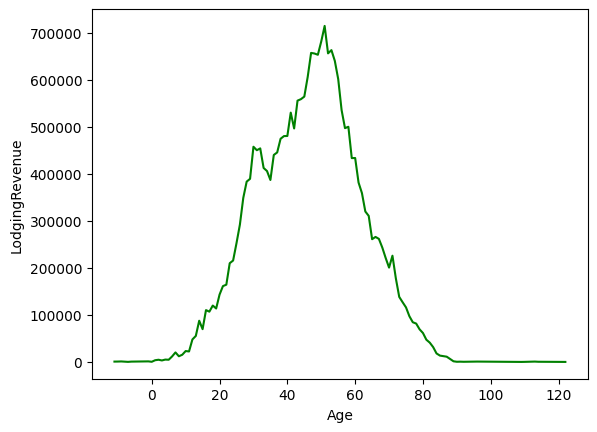

In [3]:
sns.lineplot(
    x='Age', 
    y='LodgingRevenue', 
    data=hotels,
    estimator=sum,
    errorbar=None,
    color='green'
    )